In [2]:
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics
import pandas as pd
import numpy as np
np.random.seed(0)
from sklearn.model_selection import GridSearchCV, StratifiedKFold  # , cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, precision_recall_fscore_support, confusion_matrix  # , classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score


In [3]:
DATA_PATH = "./data/"
RED = DATA_PATH + "just_red/"

In [4]:
sim_sn = pd.read_pickle(RED + 'sn_just_red.pickle')

sim_sn.shape

allnsn_small = pd.read_pickle(RED+"nsn_just_red.pickle").sample(len(sim_sn))

allnsn_small.shape

(4862, 32)

In [5]:
all_df = pd.concat([sim_sn,allnsn_small])
all_df = all_df.sample(frac = 1)

In [6]:
all_df['fact_class'] =  pd.factorize(all_df['Class'])[0]

In [7]:
all_df.head()

,,,Class,ObsCount,amplitude,beyond1st,flux_percentile_ratio_mid20,flux_percentile_ratio_mid35,flux_percentile_ratio_mid50,flux_percentile_ratio_mid65,flux_percentile_ratio_mid80,kurtosis,...,poly4_t1,poly4_t2,poly4_t3,poly4_t4,skew,small_kurtosis,std,stetson_j,stetson_k,fact_class
ID,copy_num,BANDPASS,,,,,,,,,,,,,,,,,,,,,
SN_2784,0,r,sn,7,19.648650,0.428571,0.028629,0.088772,0.458288,0.827804,0.943798,-0.836639,...,-0.962407,-0.002423,5.914914e-04,-5.970476e-06,1.079439,-5.400000,15.954266,1.372822,0.781707,0
119890,0,r,non-sn,17,14.491208,0.176471,0.073894,0.107316,0.124287,0.174392,0.493348,4.528424,...,0.027832,-0.000048,-1.811617e-07,5.769093e-10,-2.182165,-3.657143,7.218297,-0.127778,0.699567,1
370901,0,r,non-sn,13,1.936262,0.230769,0.196301,0.238049,0.353111,0.535195,0.695559,0.786923,...,0.000823,0.000024,-2.108943e-08,-1.684251e-10,-0.231410,-3.927273,0.984094,-0.173218,0.759854,1
SN_175,0,r,sn,8,102.554000,0.375000,0.182747,0.377929,0.575473,0.775614,0.925363,-1.212423,...,-5.926745,-0.103055,6.806734e-03,-7.713809e-05,0.398493,-4.900000,75.688730,11.467195,0.857640,0
2540,0,r,non-sn,35,10.581628,0.257143,0.131079,0.331641,0.430997,0.506433,0.737060,-0.050393,...,-0.014516,0.000014,3.809118e-07,-2.929770e-10,-0.374375,-3.284091,4.985387,-0.114443,0.798677,1


In [8]:
all_train, all_test = train_test_split(all_df,test_size = 0.25)

In [9]:
# all_train = pd.concat([sn_train,nsn_train])
# all_test = pd.concat([sn_test,nsn_test])
all_test = all_test.sample(frac=1)
all_train = all_train.sample(frac=1)
print(all_train.shape)
print(all_test.shape)


(7293, 33)
(2431, 33)


In [10]:
all_train.isna().sum()

Class                                  0
ObsCount                               0
amplitude                              0
beyond1st                              0
flux_percentile_ratio_mid20            0
flux_percentile_ratio_mid35            0
flux_percentile_ratio_mid50            0
flux_percentile_ratio_mid65            0
flux_percentile_ratio_mid80            0
kurtosis                               0
max_slope                              1
median_absolute_deviation              0
median_buffer_range_percentage         0
pair_slope_trend                       0
pair_slope_trend_last_30               0
percent_amplitude                      0
percent_difference_flux_percentile     0
poly1_t1                              80
poly2_t1                              80
poly2_t2                              80
poly3_t1                              80
poly3_t2                              80
poly3_t3                              80
poly4_t1                              80
poly4_t2        

In [11]:
all_test.isna().sum()

Class                                  0
ObsCount                               0
amplitude                              0
beyond1st                              0
flux_percentile_ratio_mid20            0
flux_percentile_ratio_mid35            0
flux_percentile_ratio_mid50            0
flux_percentile_ratio_mid65            0
flux_percentile_ratio_mid80            0
kurtosis                               0
max_slope                              0
median_absolute_deviation              0
median_buffer_range_percentage         0
pair_slope_trend                       0
pair_slope_trend_last_30               0
percent_amplitude                      0
percent_difference_flux_percentile     0
poly1_t1                              29
poly2_t1                              29
poly2_t2                              29
poly3_t1                              29
poly3_t2                              29
poly3_t3                              29
poly4_t1                              29
poly4_t2        

In [12]:
all_test = all_test.fillna(0)
all_train = all_train.fillna(0)

In [13]:
all_test.head()

,,,Class,ObsCount,amplitude,beyond1st,flux_percentile_ratio_mid20,flux_percentile_ratio_mid35,flux_percentile_ratio_mid50,flux_percentile_ratio_mid65,flux_percentile_ratio_mid80,kurtosis,...,poly4_t1,poly4_t2,poly4_t3,poly4_t4,skew,small_kurtosis,std,stetson_j,stetson_k,fact_class
ID,copy_num,BANDPASS,,,,,,,,,,,,,,,,,,,,,
SN_857,0,r,sn,18,57.297300,0.166667,0.067480,0.181721,0.343733,0.625670,0.780848,1.135003,...,-2.158370,0.054412,7.218488e-04,-1.963263e-05,1.490236,-3.612500,35.634694,14.807066,0.813534,0
212513,0,r,non-sn,28,7.082895,0.035714,0.073122,0.183305,0.383233,0.439382,0.693315,22.482885,...,-0.006947,-0.000039,2.451697e-08,1.857427e-10,-4.496955,-3.364615,2.448634,0.128813,0.561022,1
326438,0,r,non-sn,6,1.066016,0.333333,0.285390,0.395072,0.504755,0.648230,0.859292,-0.855613,...,0.002991,0.000043,-2.241527e-08,-2.387093e-10,-0.333152,-6.250000,0.780320,0.232406,0.873640,1
37961,0,r,non-sn,41,1.166095,0.341463,0.236002,0.353337,0.473310,0.617015,0.922994,-0.719037,...,-0.002012,-0.000005,1.224440e-08,2.731254e-11,0.212883,-3.238866,0.593221,0.221786,0.805282,1
373255,0,r,non-sn,13,0.906549,0.538462,0.245167,0.340742,0.700966,0.817139,0.920698,-1.412035,...,0.002831,-0.000004,-2.059541e-08,1.986983e-11,-0.132113,-3.927273,0.630640,-0.361287,0.882798,1


In [14]:
all_train.head()

,,,Class,ObsCount,amplitude,beyond1st,flux_percentile_ratio_mid20,flux_percentile_ratio_mid35,flux_percentile_ratio_mid50,flux_percentile_ratio_mid65,flux_percentile_ratio_mid80,kurtosis,...,poly4_t1,poly4_t2,poly4_t3,poly4_t4,skew,small_kurtosis,std,stetson_j,stetson_k,fact_class
ID,copy_num,BANDPASS,,,,,,,,,,,,,,,,,,,,,
SN_836,0,r,sn,8,50.359660,0.250000,0.497546,0.529201,0.609011,0.741791,0.891606,-1.583050,...,-1.128044,-0.140896,1.531082e-03,4.159990e-05,0.394927,-4.900000,38.151568,8.142348,0.913679,0
SN_560,0,r,sn,15,14.542340,0.266667,0.121611,0.270466,0.488981,0.718737,0.813566,0.754703,...,-0.747166,0.013431,5.801381e-04,-1.230069e-05,1.295861,-3.769231,8.651058,2.564020,0.905352,0
399603,0,r,non-sn,5,3.665545,0.200000,0.095392,0.166937,0.238481,0.524051,0.809620,4.028969,...,-0.010813,0.000030,1.558189e-07,-3.867451e-10,-1.980785,-8.000000,3.033122,0.277596,0.827262,1
221893,0,r,non-sn,55,7.094837,0.272727,0.176910,0.291103,0.365472,0.490343,0.697948,0.033869,...,0.001613,0.000104,-1.006458e-07,-6.103736e-10,0.360878,-3.174165,3.186115,1.247709,0.793933,1
SN_913,0,r,sn,21,52.143620,0.238095,0.132340,0.244789,0.481912,0.768272,0.921182,-0.376344,...,-1.745538,0.036101,3.594128e-04,-1.009856e-05,1.101555,-3.508772,35.586258,14.747841,0.927851,0


In [15]:
features = all_train.columns[1:-1]
y_train = np.array(all_train['fact_class'])

In [16]:
y_train

array([0, 0, 1, ..., 1, 1, 0])

In [17]:
clf = RandomForestClassifier(n_estimators=50,random_state=0, class_weight='balanced')

In [18]:
clf.fit(all_train[features], y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [19]:
y_test = np.array(all_test['fact_class'])

In [20]:
preds = clf.predict(all_test[features])

In [21]:
pd.crosstab(preds, y_test, rownames=['Predicted '], colnames=['Actual '])

Actual,0,1
Predicted,,
0,1208,11
1,5,1207


Text(0,0.5,'precision')

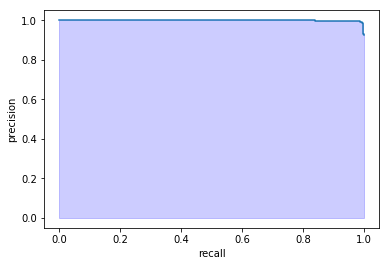

In [22]:
preds1 = clf.predict_proba(all_test[features])
precision, recall, _ = precision_recall_curve(y_test, preds1[:,0],pos_label=0)

plt.step(recall,precision)
plt.fill_between(recall, precision,step='pre', alpha=0.2,
                 color='b')
plt.xlabel('recall')
plt.ylabel('precision')